# Importing important libraries

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

# Reading Data

In [115]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Fluid-AI/marketprophecy/main/NSE%20Data/NSE%20Training%20Data%20-%201st%20Jan%202016%20to%201st%20Jan%202022.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [116]:
# Shape of data

df.shape

(1481, 7)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [118]:
# Checking Null Values
df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [119]:
df = df.dropna()

# Plotting data using Plotly library

In [157]:
df_for_plotting = df.copy()

In [158]:
# Create figure
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=list(df_for_plotting.Date), y=list(df_for_plotting.Open)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)
# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()

# Splitting dataset into training and testing dataset

In [120]:
# training data contain stock prices from 4 Jan 2016 to 30 April 2021

training_data = df[df['Date']<='2021-04-30'].copy()
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [121]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1308,2021-04-26,14449.450195,14557.500000,14421.299805,14485.000000,14485.000000,452700.0
1309,2021-04-27,14493.799805,14667.549805,14484.849609,14653.049805,14653.049805,451800.0
1310,2021-04-28,14710.500000,14890.250000,14694.950195,14864.549805,14864.549805,457000.0
1311,2021-04-29,14979.000000,15044.349609,14814.450195,14894.900391,14894.900391,517500.0
1312,2021-04-30,14747.349609,14855.450195,14601.700195,14631.099609,14631.099609,613900.0


In [122]:
# Testing data contains stock price from 1 May 2021 to 31 Dec 2021

testing_data = df[df['Date']>'2021-04-30'].copy()
testing_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1313,2021-05-03,14481.049805,14673.849609,14416.250000,14634.150391,14634.150391,448900.0
1314,2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000,14496.500000,503400.0
1315,2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609,14617.849609,455900.0
1316,2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805,14724.799805,467800.0
1317,2021-05-07,14816.849609,14863.049805,14765.500000,14823.150391,14823.150391,488000.0


In [123]:
testing_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0
1480,2021-12-31,17244.500000,17400.800781,17238.500000,17354.050781,17354.050781,167000.0


In [124]:
# removing date and Volume column

training_data_new = training_data.drop(['Date','Volume'], axis = 1)
training_data_new.head()

,Open,High,Low,Close,Adj Close
0,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805
1,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902
2,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000
3,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805
4,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098


In [125]:
# Normalizing the dataset so that it will help our model to train in a better way.

scaler = MinMaxScaler()
training_data_new = scaler.fit_transform(training_data_new)

In [126]:
training_data_new.shape

(1307, 5)

In [127]:
# Splitting the training data in X_train and y_train where
# Open = Target Variable
# High, Low, Close, AdjClose will be input for predicting Open price
# TImePeriod = Here the price of current day will be calculated on the basis of previous 5 days open price
X_train = []
y_train = []
time_period = 5

for i in range(time_period,training_data_new.shape[0]):
  X_train.append(training_data_new[i-time_period:i])
  y_train.append(training_data_new[i,0])

In [128]:
X_train,y_train = np.array(X_train), np.array(y_train)

In [129]:
X_train.shape, y_train.shape

((1302, 5, 5), (1302,))

# Training our model using LSTM

In [130]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 70, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 90, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(units=1))

In [131]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 5, 50)             11200     
                                                                 
 dropout_16 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_17 (LSTM)              (None, 5, 60)             26640     
                                                                 
 dropout_17 (Dropout)        (None, 5, 60)             0         
                                                                 
 lstm_18 (LSTM)              (None, 5, 70)             36680     
                                                                 
 dropout_18 (Dropout)        (None, 5, 70)             0         
                                                                 
 lstm_19 (LSTM)              (None, 90)               

In [132]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train,y_train, epochs = 50, verbose = 1, batch_size = 64, shuffle = False)

Epoch 1/50
21/21 [==============================] - 6s 21ms/step - loss: 0.1077
Epoch 2/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0284
Epoch 3/50
21/21 [==============================] - 0s 21ms/step - loss: 0.0183
Epoch 4/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0177
Epoch 5/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0536
Epoch 6/50
21/21 [==============================] - 0s 21ms/step - loss: 0.0132
Epoch 7/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0161
Epoch 8/50
21/21 [==============================] - 0s 21ms/step - loss: 0.0089
Epoch 9/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0068
Epoch 10/50
21/21 [==============================] - 0s 21ms/step - loss: 0.0080
Epoch 11/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0072
Epoch 12/50
21/21 [==============================] - 0s 20ms/step - loss: 0.0037
Epoch 13/50
21/21 [==================

# Checking prediction on Training Data

In [133]:
y_train_pred = model.predict(X_train)

In [161]:
print('Mean Squared Error', mean_squared_error(y_train_pred, y_train, squared=False))

Mean Squared Error 0.034483955783095765


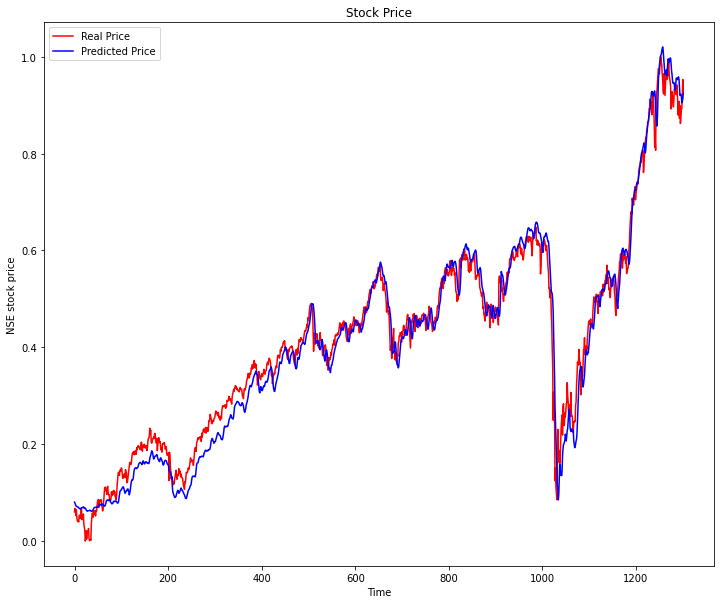

In [136]:
plt.figure(figsize=(12,10))
plt.plot(y_train, color = 'red', label = 'Real Price')
plt.plot(y_train_pred, color = 'blue', label = 'Predicted Price')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('NSE stock price')
plt.legend()
plt.show()

# Checking Prediction on Testing Data

In [137]:
# Here taking last 5 days of training dataset
past_5_days = training_data.tail(5)

In [138]:
# Appending last 5 days of training data to testing dataset
df_new = past_5_days.append(testing_data, ignore_index = True)

In [139]:
df_new = df_new.drop(['Date','Volume'], axis = 1)
df_new.head()

,Open,High,Low,Close,Adj Close
0,14449.450195,14557.500000,14421.299805,14485.000000,14485.000000
1,14493.799805,14667.549805,14484.849609,14653.049805,14653.049805
2,14710.500000,14890.250000,14694.950195,14864.549805,14864.549805
3,14979.000000,15044.349609,14814.450195,14894.900391,14894.900391
4,14747.349609,14855.450195,14601.700195,14631.099609,14631.099609


In [140]:
inputs = scaler.transform(df_new)

In [141]:
X_test =[]
y_test = []

for i in range(time_period, inputs.shape[0]):
  X_test.append(inputs[i-time_period:i])
  y_test.append(inputs[i,0])

In [142]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((168, 5, 5), (168,))

In [143]:
y_test_pred = model.predict(X_test)

In [160]:
print('Mean Squared Error', mean_squared_error(y_test_pred, y_test, squared=False))

Mean Squared Error 0.0408348530536218


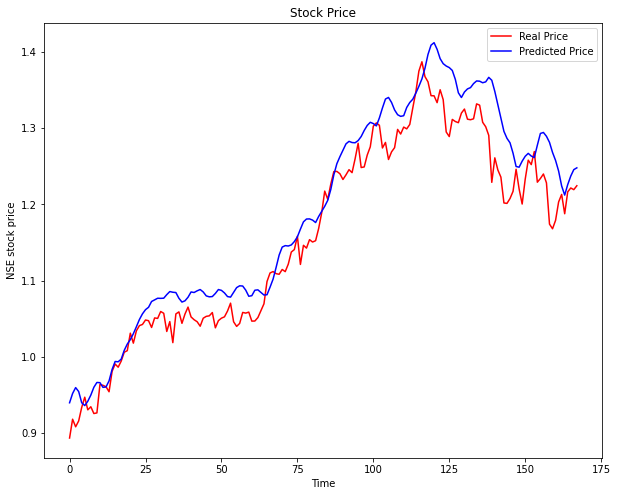

In [146]:
plt.figure(figsize=(10,8))
plt.plot(y_test, color = 'red', label = 'Real Price')
plt.plot(y_test_pred, color = 'blue', label = 'Predicted Price')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('NSE stock price')
plt.legend()
plt.show()

# Importing Out of time dataset

In [147]:
out_of_time = pd.read_csv(r'https://raw.githubusercontent.com/Fluid-AI/marketprophecy/main/NSE%20Data/NSE%20Out%20of%20Time%20Testing%20Data%20-%201st%20Jan%202022%20to%204th%20Feb%202022.csv')
out_of_time.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300


In [148]:
# Appending last 5 days price of Testing dataset 
past_5_days_oot = testing_data.tail(5)
oot_df = past_5_days_oot.append(out_of_time, ignore_index = True)

In [149]:
oot_df = oot_df.drop(['Date','Volume'], axis = 1)
oot_df.head()

,Open,High,Low,Close,Adj Close
0,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000
1,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000
2,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609
3,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219
4,17244.500000,17400.800781,17238.500000,17354.050781,17354.050781


In [150]:
inputs1 = scaler.transform(oot_df)

In [151]:
X_test_oot =[]
y_test_oot = []

for i in range(time_period, inputs1.shape[0]):
  X_test_oot.append(inputs1[i-time_period:i])
  y_test_oot.append(inputs1[i,0])


In [152]:
X_test_oot, y_test_oot = np.array(X_test_oot), np.array(y_test_oot)
X_test_oot.shape, y_test_oot.shape

((23, 5, 5), (23,))

In [153]:
y_test_pred_oot = model.predict(X_test_oot)

In [159]:
print('Mean Squared Error', mean_squared_error(y_test_pred_oot, y_test_oot, squared=False))

Mean Squared Error 0.06399612590617451


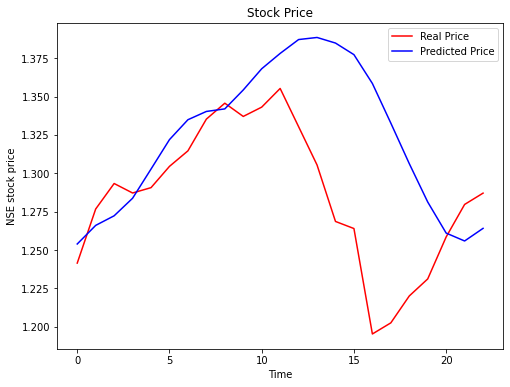

In [155]:
plt.figure(figsize=(8,6))
plt.plot(y_test_oot, color = 'red', label = 'Real Price')
plt.plot(y_test_pred_oot, color = 'blue', label = 'Predicted Price')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('NSE stock price')
plt.legend()
plt.show()